In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


En la celda se carga el dataset con el que vamos a trabjar, crea una variable em donde esten solo las personas que tengan un numero de imagenes = a 60, al final se imprimen los nombres de las personas de faces.

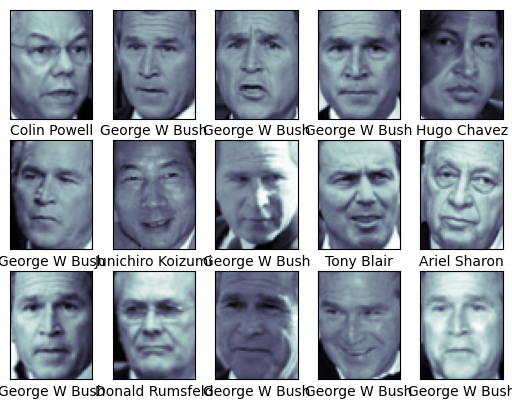

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

en este se hace un recuadro donde se pueden ver la primeras 15 caras que es de 3x5, y tambien con faces que es la variable que se crao anteriormente se acomoda los nombreds con la imgen de cada nombre 

In [3]:

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

llama a las librerias que se utilizaran, una de ellas es para hacer reduccion de dimensiones, otra para clasificacion, la variable pca es para mapear 150 imagenes propias, luego svc lo utiliza como clasificador y con el make_pipeline une estas dos 

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

hace sus x y y test y train, esto para generalizar y evitar el sorbreajuste

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 2min 53s
Wall time: 22.1 s
{'svc__C': 5, 'svc__gamma': 0.001}


con el param grid hacemos dos hiperparametros, esto para que nos de con la conmbinacion de esos dos los mejores, con el fit ejecuta esa validacion cruzada y te da la combinacion con mayor precision

In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

con eta celda terminamos de crea nuesro modelo para poder hacer las predicciones con nustra y_test

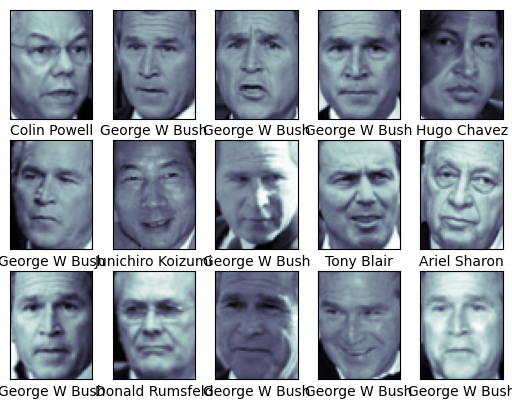

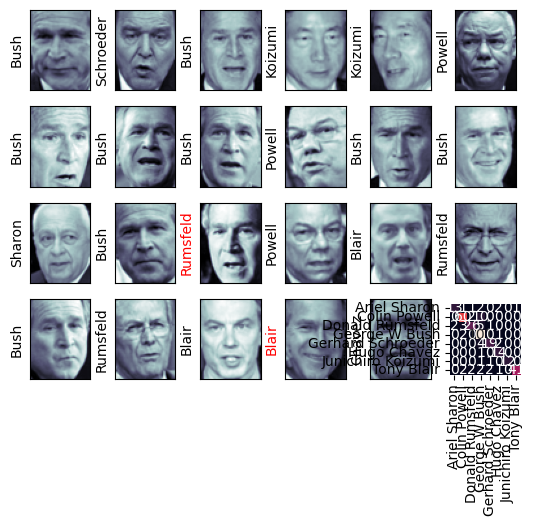

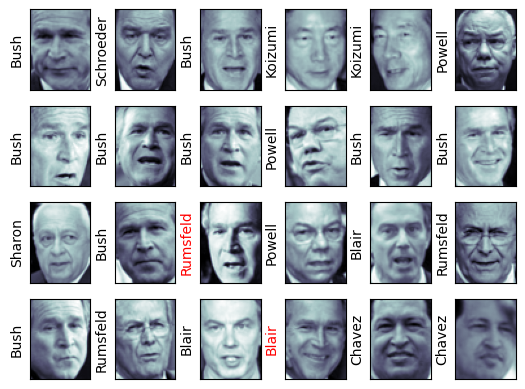

In [10]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
plt.show()

con este codigo nos muestra de manera visual nuestro modelo y lo categoriza por las imgenes son el apellido de la persona, en un fromato de 4x6 en donde pone los apellidos en rojo cuando el modelo fue erroneo y en negro cuando el modelo fue correcto, esto lo hace poniendo que cuando el yfit y ytest son iguales sino es rojo 

In [13]:

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



compara las etiquetas reales con las etiquetas pedrichas, con esto nos da una percepcion de como esta nuestro modelo y cual es la precision 

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

<Axes: >

compara la etiquetas reales con las predichas, el heatmap muestra el numero de veces que una persona fue predicha y los errores de clasificacion 

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
print("Forma de las imágenes:", digits.images.shape)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    digits.data, digits.target, random_state=42
)


Forma de las imágenes: (1797, 8, 8)


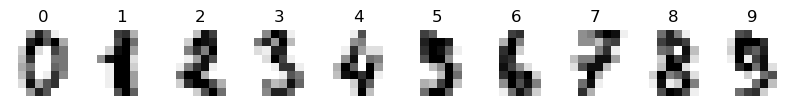

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for ax, image, target in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'{target}')

plt.show()

In [21]:
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01]
}

grid = GridSearchCV(SVC(), param_grid)

print("Iniciando Grid Search...")
%time grid.fit(Xtrain, ytrain)

print("\nMejores parámetros encontrados:")
print(grid.best_params_)

model = grid.best_estimator_

Iniciando Grid Search...
CPU times: total: 5.47 s
Wall time: 5.63 s

Mejores parámetros encontrados:
{'C': 10, 'gamma': 0.001}


In [22]:
from sklearn.metrics import classification_report
yfit = model.predict(Xtest)

print("\n--- Reporte de Clasificación (SVC Optimizado) ---")
print(classification_report(ytest, yfit))


--- Reporte de Clasificación (SVC Optimizado) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.98      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



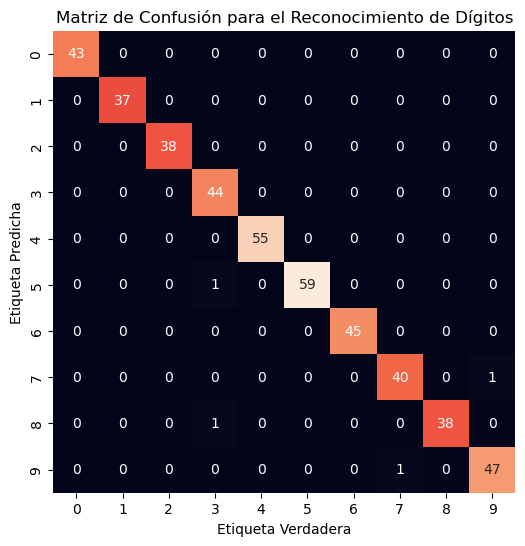

In [23]:
import numpy as np

mat = confusion_matrix(ytest, yfit)

target_names = np.arange(10)

plt.figure(figsize=(8, 6))
sns.heatmap(
    mat.T, 
    square=True,
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel('Etiqueta Verdadera')
plt.ylabel('Etiqueta Predicha')
plt.title('Matriz de Confusión para el Reconocimiento de Dígitos')
plt.show()